# Analysis of Feature Selection

In [1]:
import pandas as pd
import configuration
from data_loading import load_data
from utils import plot_feature_importance
import pickle

output_path = configuration.output_path + r"/plots/feature_selection/"

In [2]:
def load_result(file: str) -> pd.DataFrame:
    out_path = configuration.output_path + "feature_selection/"
    out_path_table = configuration.output_path + r"/tables/"
    
    with open(out_path + file, 'rb') as f:
        temp = pickle.load(f)
    
    temp = pd.DataFrame(temp, columns = ['Features', 'Mean', 'Std', 'Median'])

    temp['Features']  = temp['Features'].apply(lambda x: sorted(x))
    temp['Features'] = temp['Features'].str.join(";")
    
    temp.sort_values(by = ['Median'], ascending = True, inplace = True)
    temp.reset_index(drop = True, inplace = True)
    temp = temp.round(2)
    
    temp.to_csv(out_path_table + file + ".csv", encoding='utf-8', sep = ',', index = False)
    
    return temp

def compute_feature_importance(df: pd.DataFrame, topK: int = 6, n: int = 20) -> tuple[list[str], list[float]]:
    data = load_data()
    features = set(data.columns) - {configuration.date_column, configuration.target_column}
    feature_importance = {f: 0 for f in features}
    
    for f in features:
        for selection in df[:n]['Features'].tolist():
            if f in selection:
                feature_importance[f] += 1
                
    feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}
    
    sizes, labels = [], []
    
    for idx, (k, v) in enumerate(feature_importance.items()):
        if idx <= topK - 1:
            sizes.append(v / n * 100)
            labels.append(k)
            
    return labels, sizes

In [3]:
result = load_result("Feature Selection Look Ahead 1",)

print("Number of Nodes explored: ", len(result))

result

Number of Nodes explored:  130


,Features,Mean,Std,Median
0,IR;MOV ;Rho,1.36,1.52,0.86
1,CPI;MOV ;RV;Rho,2.46,4.50,0.93
2,CF,1.09,0.62,0.96
3,CF;MOV ;RV,2.36,2.64,1.06
4,CAPE;IR;MOV ;Rho,2.10,2.25,1.09
...,...,...,...,...
125,CAPE;EMP;MG;RV,10.47,9.65,7.53
126,MOV ;Rho;_OIL,10.33,7.51,9.48
127,CPI;MOV ;Rho;_OIL,11.87,7.92,11.01
128,_OIL,12.73,5.86,12.55


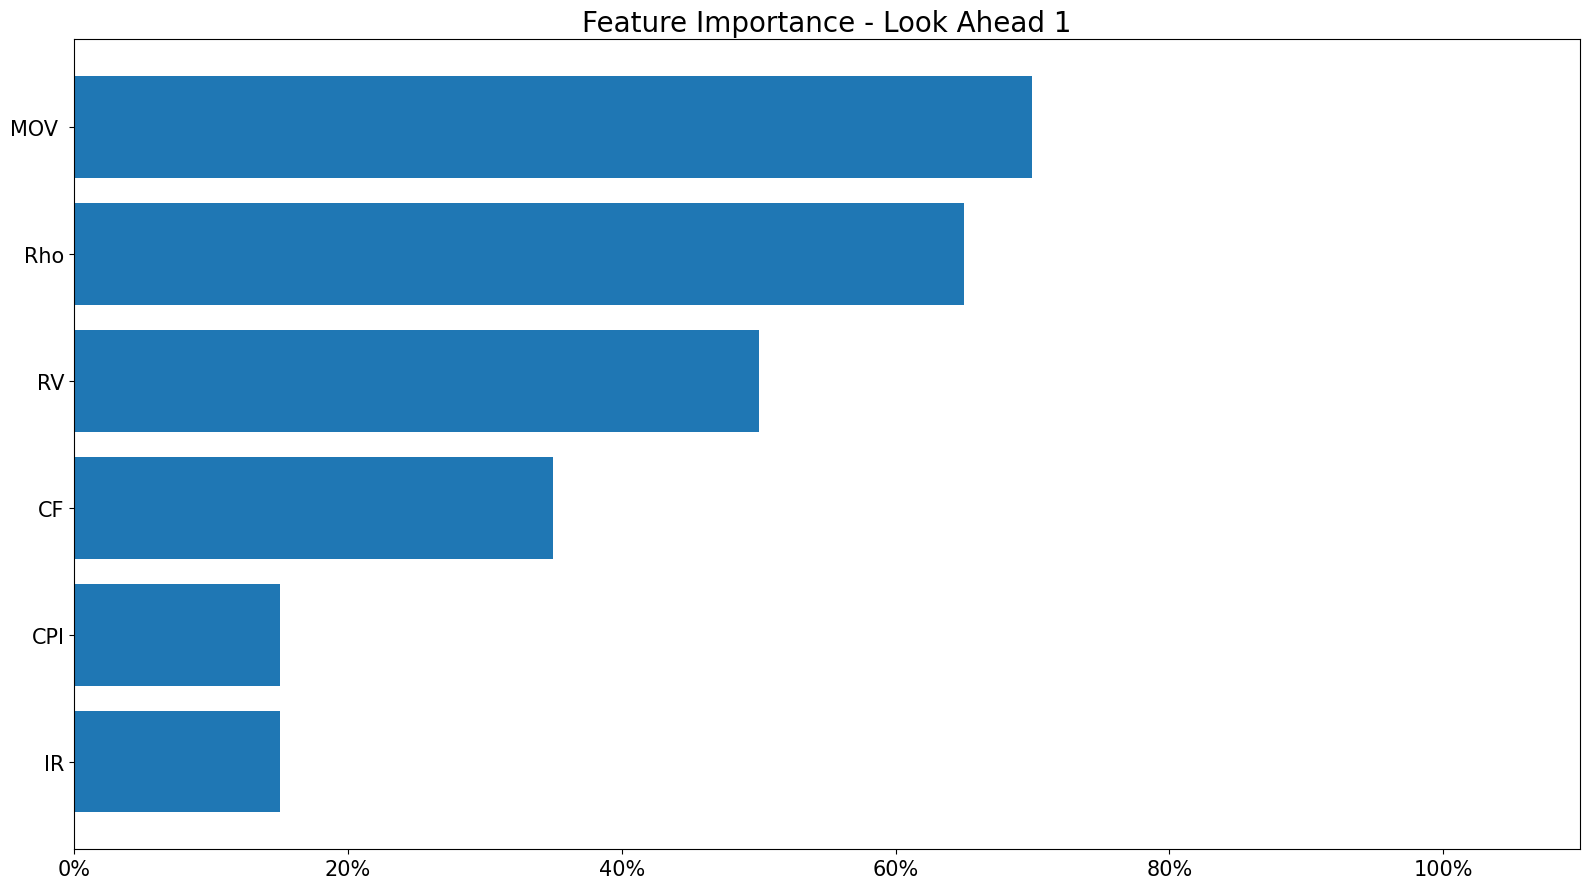

In [4]:
labels, sizes = compute_feature_importance(result)

plot_feature_importance(labels, sizes, title = "Feature Importance - Look Ahead 1", output_path=output_path)

In [5]:
result = load_result("Feature Selection Look Ahead 4",)

print("Number of Nodes explored: ", len(result))

result.head(10)

Number of Nodes explored:  77


,Features,Mean,Std,Median
0,CF;PE;RV;Rho,1.39,0.69,1.11
1,CF;MOV ;Rho;UN,1.94,1.71,1.14
2,CF,2.29,3.24,1.14
3,,1.99,1.80,1.20
4,CF;EMP;PE;Rho,2.20,1.67,1.24
5,CF;IR;NYF,4.47,6.14,1.37
6,CF;NYF,2.75,2.81,1.40
7,CF;M2;MOV ;Rho,2.10,1.22,1.57
8,CF;PE;Rho;_LCP,2.53,2.28,1.62
9,CF;PE;Rho,2.67,1.98,1.62


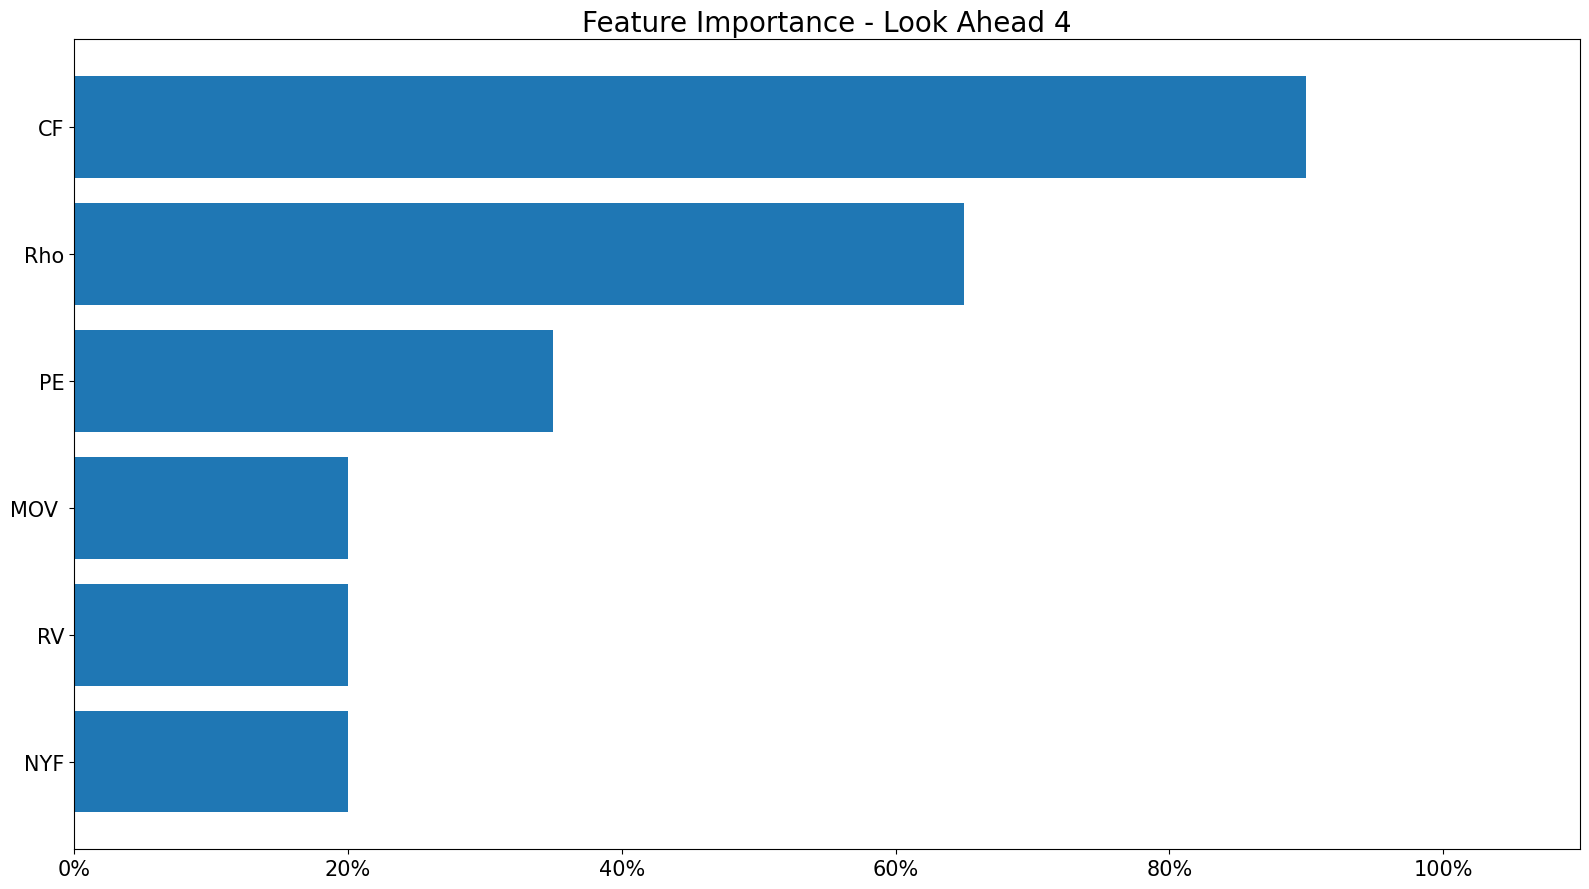

In [6]:
labels, sizes = compute_feature_importance(result)

plot_feature_importance(labels, sizes, title = "Feature Importance - Look Ahead 4", output_path=output_path)

In [7]:
result = load_result("Feature Selection Look Ahead 13",)

print("Number of Nodes explored: ", len(result))

result.head(10)

Number of Nodes explored:  129


,Features,Mean,Std,Median
0,CF;MOV ;_AU;_TY,2.83,2.28,1.45
1,CF;MOV ;RR,2.20,1.74,1.45
2,CF;MOV ;STP;_TY,2.46,2.32,1.49
3,CF;_TY,1.88,1.24,1.49
4,CF;MOV ;RR;_TY,1.88,1.37,1.49
5,CF;MOV ;_TY,1.92,1.57,1.55
6,CF;YSS;_TY,2.78,2.36,1.55
7,CF;GDP;YSS;_TY,2.66,2.32,1.57
8,CF;MOV ;RR;UN,2.39,2.06,1.60
9,CF;M2;MOV ;_TY,3.69,5.85,1.63


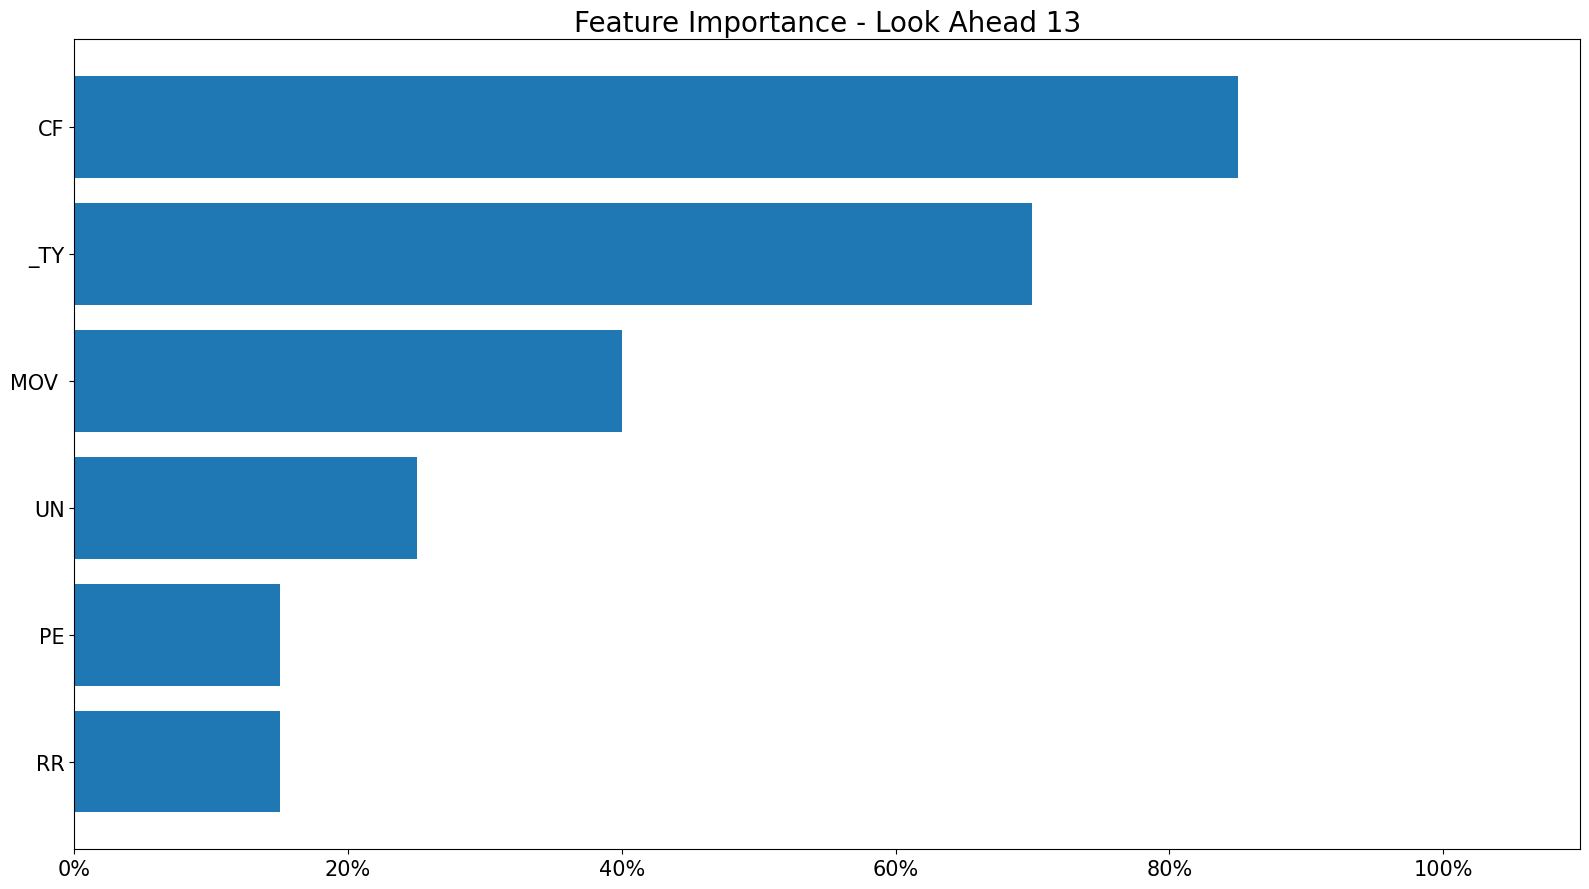

In [8]:
labels, sizes = compute_feature_importance(result)

plot_feature_importance(labels, sizes, title = "Feature Importance - Look Ahead 13", output_path=output_path)

In [9]:
result = load_result("Feature Selection Look Ahead 52",)

print("Number of Nodes explored: ", len(result))

result.head(10)

Number of Nodes explored:  129


,Features,Mean,Std,Median
0,UN;YSS;_DXY;_TY,3.18,1.60,2.45
1,UN;YSS;_AU;_TY,3.47,2.49,2.63
2,NYF;Rho;UN;YSS,3.44,1.39,3.07
3,UN;YSS;_LCP;_TY,4.19,3.36,3.12
4,NYF;UN;Y10;YSS,4.00,2.76,3.19
5,GDP;NYF;UN;YSS,5.07,3.20,3.65
6,UN;Y02;YSS,4.02,2.40,3.81
7,RR;RV;UN;YSS,5.54,3.91,3.96
8,IR;UN;YSS,4.89,2.69,4.07
9,UN;Y02;YSS;_LCP,5.06,2.25,4.12


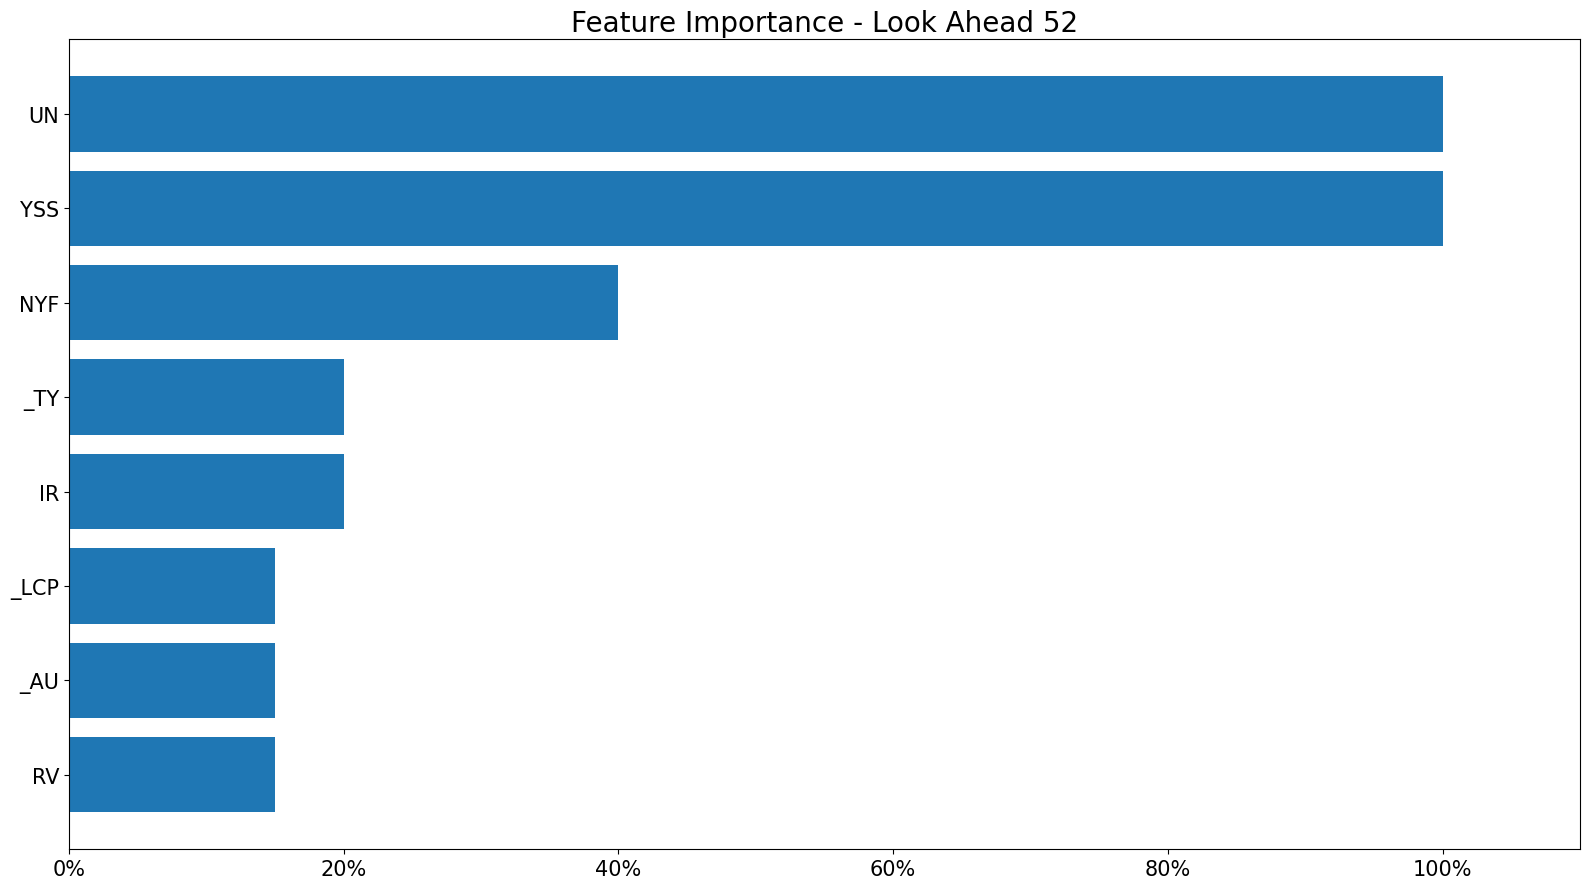

In [10]:
labels, sizes = compute_feature_importance(result, topK=8)

plot_feature_importance(labels, sizes, title = "Feature Importance - Look Ahead 52", output_path=output_path)

In [11]:
result = load_result("Feature Selection Look Ahead 52 depth limited",)

print("Number of Nodes explored: ", len(result))

result.head(10)

Number of Nodes explored:  320


,Features,Mean,Std,Median
0,NYF;UN;_TY,5.62,6.66,2.09
1,NYF;UN;Y10,4.03,2.55,3.15
2,IR;UN;YSS,4.02,1.81,3.36
3,CAPE;MOV ;Y02,6.03,5.60,3.41
4,UN;_LCP;_TY,5.18,6.08,3.46
5,EMP;UN;_TY,3.66,1.52,3.53
6,UN;_AU;_TY,5.66,4.92,3.64
7,IR;MOV ;_AU,4.89,3.84,3.66
8,MOV ;UN;Y02,4.38,2.88,3.69
9,IR;MOV ;PE,5.17,3.58,3.78


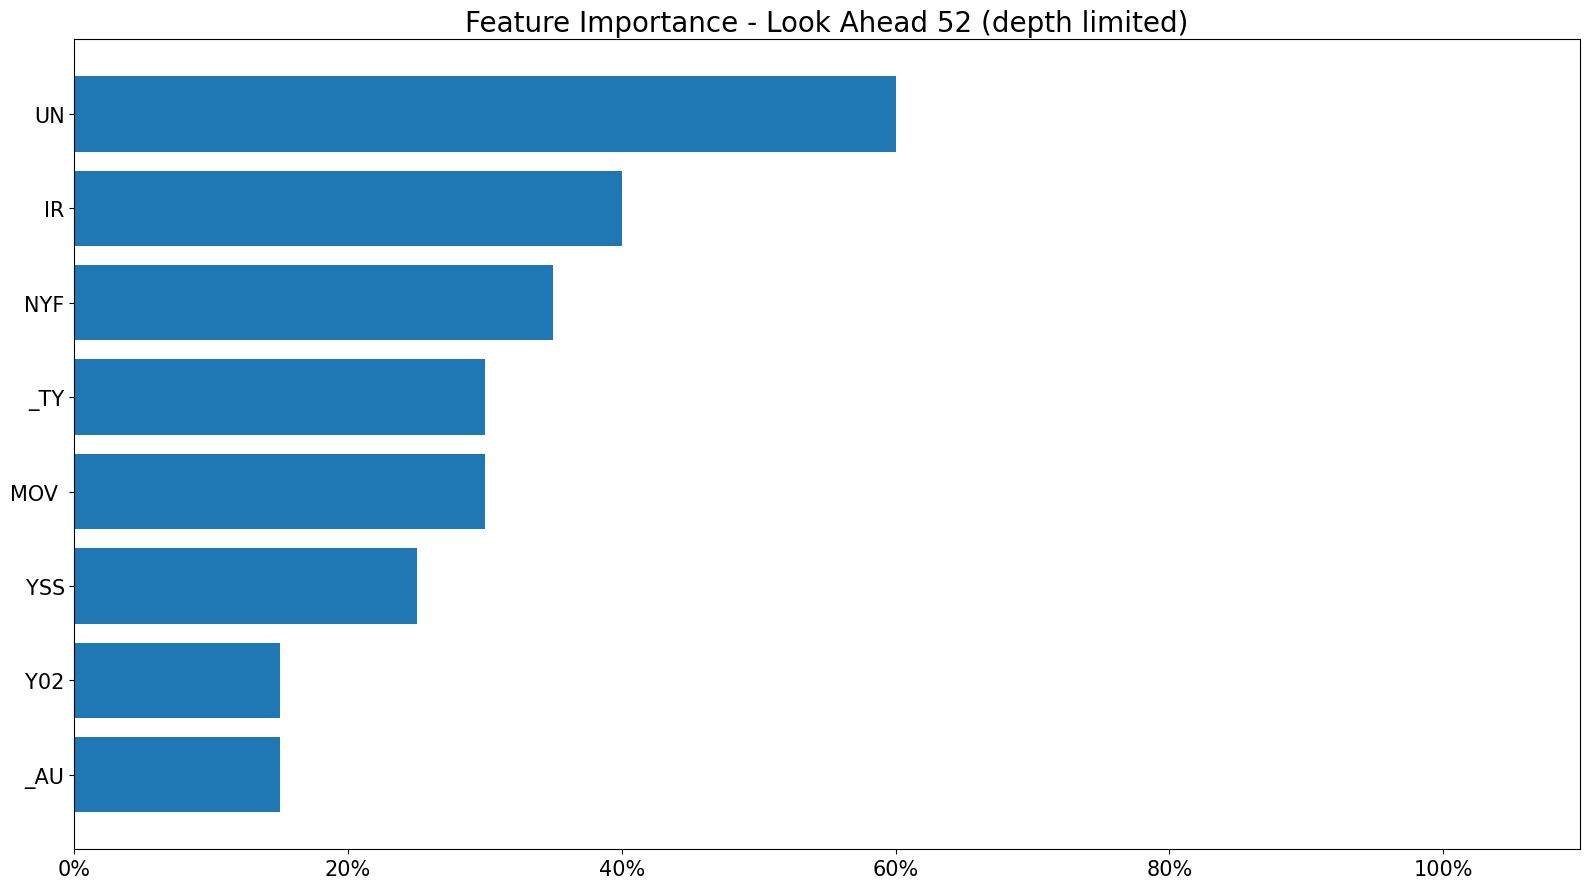

In [12]:
result.head(10)
labels, sizes = compute_feature_importance(result, topK=8, n = 20)

plot_feature_importance(labels, sizes, title="Feature Importance - Look Ahead 52 (depth limited)", output_path=output_path)